# Introduction to TensorFlow

TensorFlow — це комплексна платформа для машинного навчання. Вона підтримує наступне:

- Числові обчислення на основі багатовимірних масивів (подібно до NumPy).
- Обробку на графічних процесорах (GPU) та розподілену обробку.
- Автоматичне диференціювання.
- Побудову, навчання та експорт моделей.
- ...


## Від NumPy до TensorFlow

Досі ми завжди використовували NumPy для побудови нейронних мереж, але цього разу ми розглянемо фреймворк глибокого навчання, який дозволяє будувати нейронні мережі набагато простіше. Фреймворки машинного навчання, такі як TensorFlow, PaddlePaddle, Torch, Caffe, Keras та багато інших, можуть значно пришвидшити розробку вашого машинного навчання. TensorFlow 2.3 вніс значні покращення в порівнянні з попередником, з деякими з яких ви зіткнетеся і які реалізуєте тут!

Після завершення цього заняття ви зможете робити наступне в TensorFlow 2:

* Використовувати `tf.Variable` для зміни стану змінної.
* Пояснювати різницю між змінною та константою.
* Навчати нейронну мережу на наборі даних TensorFlow.

Програмні фреймворки, такі як TensorFlow, не лише скорочують час, витрачений на кодування, але й можуть виконувати оптимізації, що пришвидшують сам код.




## Tensors

TensorFlow працює з багатовимірними масивами, або _тензорами_, що представлені як об'єкти `tf.Tensor`. Ось двовимірний тензор:

In [ ]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]], dtype=tf.float64)

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


Найважливішими атрибутами `tf.Tensor` є його `shape` та `dtype`:

* `Tensor.shape`: повідомляє розмір тензора вздовж кожної з його осей.
* `Tensor.dtype`: повідомляє тип усіх елементів у тензорі.


TensorFlow реалізує стандартні математичні операції над тензорами, а також багато операцій, спеціалізованих для машинного навчання.

Наприклад:


In [ ]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [ ]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [ ]:
tf.transpose(x) @ x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[17., 22., 27.],
       [22., 29., 36.],
       [27., 36., 45.]], dtype=float32)>

In [ ]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.concat([x, x, x], axis=1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

In [ ]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [ ]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

Примітка: Як правило, коли функція TensorFlow очікує `Tensor` на вході, вона також прийме будь-що, що можна перетворити на `Tensor` за допомогою `tf.convert_to_tensor`. Дивіться приклад нижче.




In [ ]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

Виконання великих обчислень на центральному процесорі (CPU) може бути повільним. При правильній конфігурації TensorFlow може використовувати апаратне прискорення, таке як графічні процесори (GPU), для дуже швидкого виконання операцій.


In [ ]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


Refer to the [Tensor guide](tensor.ipynb) for details.

## Variables

Звичайні об'єкти tf.Tensor є незмінними. Для зберігання ваг моделі (або іншого змінного стану) у TensorFlow використовуйте tf.Variable.


In [ ]:
var = tf.Variable([0.0, 0.0, 0.0])

In [ ]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

Refer to the [Variables guide](variable.ipynb) for details.

## Automatic differentiation

<a href="https://uk.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D1%96%D1%94%D0%BD%D1%82%D0%BD%D0%B8%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA" class="external">_Градієнтний спуск_</a> та пов'язані з ним алгоритми є основою сучасного машинного навчання.

Щоб забезпечити це, TensorFlow реалізує автоматичне диференціювання (autodiff), яке використовує математичний аналіз для обчислення градієнтів. Зазвичай ви будете використовувати це для обчислення градієнта _помилки_ або _втрат_ моделі щодо її ваг.




In [ ]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [ ]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

При `x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2`.

Похідна від `y` це `y' = f'(x) = (2*x + 2) = 4`. TensorFlow може порахувати це автоматично:

In [ ]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

Цей спрощений приклад обчислює похідну лише за однією скалярною величиною (`x`), але TensorFlow може одночасно обчислювати градієнт за будь-якою кількістю нескалярних тензорів.


Refer to the [Autodiff guide](autodiff.ipynb) for details.

## Graphs and tf.function

### Що таке графи?




Граф — це сукупність об'єктів із зв'язками між ними.

Об'єкти розглядаються як вершини, або вузли графа, а зв'язки — як дуги, або ребра. Для різних галузей види графів можуть відрізнятися орієнтованістю, обмеженнями на кількість зв'язків і додатковими даними про вершини або ребра.

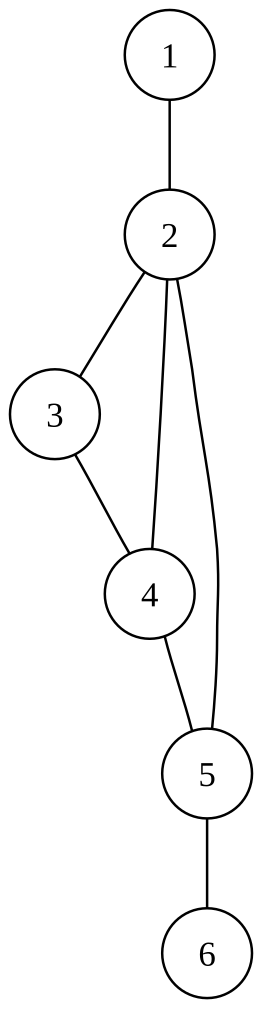

До цього ми запускали TensorFlow в **режимі eager execution** (імперативне виконання). Це означає, що операції TensorFlow виконуються Python поетапно, і результати повертаються назад у Python.

Хоча eager execution має кілька унікальних переваг, **режим graph execution** (виконання графів) забезпечує переносимість за межі Python і, як правило, пропонує кращу продуктивність. Виконання графів означає, що обчислення тензорів виконуються як *граф TensorFlow*, який іноді називають `tf.Graph` або просто "граф".

**Графи — це структури даних, що містять набір об'єктів `tf.Operation`, які представляють одиниці обчислення; і об'єкти `tf.Tensor`, які представляють одиниці даних, що протікають між операціями.** Вони визначені в контексті `tf.Graph`. Оскільки ці графи є структурами даних, їх можна зберігати, запускати та відновлювати без оригінального коду Python.

Ось як виглядає граф TensorFlow, що представляє двошарову нейронну мережу, візуалізований у TensorBoard:

<img alt="A simple TensorFlow graph" src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/intro_to_graphs/two-layer-network.png?raw=1">

Хоча можна використовувати TensorFlow інтерактивно, як і будь-яку бібліотеку Python, TensorFlow також надає інструменти для:

* **Оптимізації продуктивності**: щоб пришвидшити навчання та висновок.
* **Експорту**: щоб ви могли зберегти свою модель після завершення навчання.

Для цього потрібно використовувати `tf.function`, щоб відокремити ваш чистий код TensorFlow від коду Python.




### Переваги графів

Графи надають вам велику гнучкість. Ви можете використовувати свій граф TensorFlow у середовищах, де немає інтерпретатора Python, таких як мобільні програми, вбудовані пристрої та серверні додатки. TensorFlow використовує графи як формат для [збережених моделей](./saved_model.ipynb), коли експортує їх з Python.

Графи також легко оптимізувати, що дозволяє компілятору виконувати такі перетворення, як:

* Статично визначати значення тензорів шляхом згортання постійних вузлів у ваших обчисленнях *("constant folding")*.
* Розділяти незалежні частини обчислень і розподіляти їх між потоками або пристроями.
* Спрощувати арифметичні операції шляхом виключення спільних підвиразів.


Існує ціла система оптимізації, [Grappler](./graph_optimization.ipynb), яка виконує це та інші прискорення.

Коротше кажучи, графи надзвичайно корисні і дозволяють вашому коду TensorFlow працювати **швидко**, працювати **паралельно** і ефективно працювати **на кількох пристроях**.

Однак ви все ще хочете визначати свої моделі машинного навчання (або інші обчислення) у Python для зручності, а потім автоматично створювати графи, коли вони вам знадобляться.




In [ ]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

Вперше при виконанні `tf.function`, хоча вона виконується в Python, створюється повна, оптимізована граф-схема, яка представляє обчислення TensorFlow, що виконуються всередині функції.

In [ ]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

При наступних викликах TensorFlow виконує лише оптимізований граф, пропускаючи будь-які кроки, що не стосуються TensorFlow. Зверніть увагу, що `my_func` не виводить _tracing_, оскільки `print` є функцією Python, а не функцією TensorFlow.

In [ ]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

Граф може бути непридатним для повторного використання з вхідними даними, що мають інший _підпис_ (`shape` і `dtype`), тому замість цього генерується новий граф:

In [ ]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

Ці захоплені графи надають дві переваги:

* У багатьох випадках вони значно прискорюють виконання (хоча не в цьому простому прикладі).
* Ви можете експортувати ці графи, використовуючи `tf.saved_model`, щоб запускати їх на інших системах, таких як [сервер](https://www.tensorflow.org/tfx/serving/docker) або [мобільний пристрій](https://www.tensorflow.org/lite/guide), без необхідності встановлення Python.

# Tensorflow NN Implementation

<a name='1'></a>
## 1 - Packages

In [ ]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time

In [ ]:
tf.__version__

'2.17.0'

## 2 - Базова оптимізація з GradientTape

Краса TensorFlow 2 полягає в його простоті. Основна задача — реалізувати пряме поширення через обчислювальний граф. TensorFlow автоматично обчислить похідні, просуваючись у зворотному напрямку через граф, записаний за допомогою `GradientTape`. Все, що залишиться зробити — це вказати функцію втрат і оптимізатор, який ви хочете використовувати!

При написанні програми на TensorFlow основним об'єктом, що використовується та трансформується, є `tf.Tensor`. Ці тензори є еквівалентом масивів Numpy в TensorFlow, тобто багатовимірними масивами певного типу даних, які також містять інформацію про обчислювальний граф.

Нижче ви використаєте `tf.Variable` для збереження стану ваших змінних. Змінні можуть бути створені лише один раз, оскільки їх початкове значення визначає форму і тип змінної. Крім того, аргумент `dtype` в `tf.Variable` можна встановити для перетворення даних до вказаного типу. Якщо ж жоден не вказаний, то тип даних збережеться, якщо початковим значенням є Tensor, або ж буде визначено за допомогою `convert_to_tensor`. Загалом, краще явно вказувати тип, щоб уникнути помилок!

In [ ]:
from sklearn.datasets import fetch_openml
# Load data
mnist_data = fetch_openml("mnist_784")
x = mnist_data["data"]
y = mnist_data["target"]

# Normalize
x /= 255.0

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# One-hot encode labels
num_labels = 10

x_new = x.to_numpy()
y_new = y.to_numpy().reshape(-1, 1)
y_new = OneHotEncoder(sparse=False).fit_transform(y_new)


# Split, reshape, shuffle
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
x_train = tf.data.Dataset.from_tensor_slices(tf.cast(x_train, tf.float32))
y_train = tf.data.Dataset.from_tensor_slices(tf.cast(y_train, tf.float32))

x_test = tf.data.Dataset.from_tensor_slices(tf.cast(x_test, tf.float32))
y_test = tf.data.Dataset.from_tensor_slices(tf.cast(y_test, tf.float32))

In [ ]:
type(x_train)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

Оскільки TensorFlow Datasets є генераторами, ви не можете безпосередньо отримати доступ до їх вмісту, поки не проітеруєте їх у циклі `for`, або ж явно створите ітератор Python за допомогою `iter` і споживатимете його елементи за допомогою `next`. Також ви можете перевірити `shape` і `dtype` кожного елемента за допомогою атрибута `element_spec`.

In [ ]:
print(x_train.element_spec)

TensorSpec(shape=(784,), dtype=tf.float32, name=None)


### 2.1 - Лінійна функція

Почнемо з обчислення наступного рівняння: $Y = WX + b$, де $W$ і $X$ є випадковими матрицями, а $b$ — випадковим вектором.

In [ ]:
np.random.seed(1)

In [ ]:
def linear_function(X):
    """
    Implements a linear function:
            Initializes W to be a random tensor of shape (1, 3)
            Initializes b to be a random tensor of shape (1, 1)
    Returns:
    result -- Y = WX + b
    """

    W = tf.Variable(np.random.randn(1, 3), name = "W")
    b = tf.Variable(np.random.randn(1, 1), name = "b")
    Y = (W @ X) + b

    return Y

In [ ]:
X = tf.constant(np.random.randn(3,1), name = "X")

result = linear_function(X)
print(result)

tf.Tensor([[1.21537304]], shape=(1, 1), dtype=float64)


### 2.4 - Ініціалізація параметрів

Ініціалізуйте вектор чисел за допомогою ініціалізатора Glorot. Функція, яку ви будете викликати, називається `tf.keras.initializers.GlorotNormal`. Вона бере вибірки з усіченого нормального розподілу з центром у 0 і стандартним відхиленням, яке дорівнює `stddev = sqrt(2 / (fan_in + fan_out))`, де `fan_in` — це кількість вхідних одиниць, а `fan_out` — кількість вихідних одиниць у ваговому тензорі.

In [ ]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with TensorFlow.

    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2
    """

    initializer = tf.keras.initializers.GlorotNormal(seed=1)
    W1 = tf.Variable(initializer(shape=(64, 784)))
    b1 = tf.Variable(initializer(shape=(64, 1)))
    W2 = tf.Variable(initializer(shape=(10, 64)))
    b2 = tf.Variable(initializer(shape=(10, 1)))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

In [ ]:
parameters = initialize_parameters()

## 3 - Створення вашої першої нейронної мережі в TensorFlow

У цій частині побудуйте нейронну мережу за допомогою TensorFlow. Пам'ятайте, що реалізація моделі TensorFlow складається з двох основних частин:

- Реалізація прямого поширення (forward propagation)
- Отримання градієнтів та навчання моделі

### 3.1 - Реалізація прямого поширення

Однією з головних переваг TensorFlow є те, що вам потрібно реалізувати лише функцію прямого поширення, і він автоматично відстежуватиме всі виконані операції для автоматичного обчислення зворотного поширення (back propagation).

In [ ]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> SOFTMAX

    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2"
                  the shapes are given in initialize_parameters

    Returns:
    Z2 -- the output of the last LINEAR unit
    """

    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = (W1 @ X) + b1
    A1 = tf.keras.activations.relu(Z1)
    Z2 = (W2 @ A1) + b2

    return Z2

### 3.2 Обчислення загальних втрат

Тепер нам потрібно визначити функцію втрат, яку ви будете використовувати. У цьому випадку, оскільки у нас є задача класифікації з 10 мітками, підійде крос-ентропія для категорій (categorical cross-entropy)!

In [ ]:
def compute_total_loss(logits, labels):
    """
    Computes the total loss

    Arguments:
    logits -- output of forward propagation (output of the last LINEAR unit), of shape (10, num_examples)
    labels -- "true" labels vector, same shape as Z2

    Returns:
    total_loss - Tensor of the total loss value
    """

    logits = tf.transpose(logits)
    labels = tf.transpose(labels)

    total_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return total_loss

### 3.3 - Навчання моделі

Поговоримо про оптимізатори. Вам потрібно вказати тип оптимізатора в один рядок, у цьому випадку `tf.keras.optimizers.Adam` (хоча можна використовувати й інші, такі як SGD), а потім викликати його всередині циклу навчання.

Зверніть увагу на функцію `tape.gradient`: вона дозволяє отримувати операції, записані для автоматичного диференціювання всередині блоку `GradientTape`. Далі, виклик методу оптимізатора `apply_gradients` застосовує правила оновлення оптимізатора до кожного навчального параметра. У кінці цього завдання ви знайдете документацію, яка пояснює це більш детально, але поки що просте пояснення підійде. ;)

Тут слід звернути увагу на важливий додатковий крок, який був доданий до процесу навчання партій:

- `tf.Data.dataset = dataset.prefetch(8)`

Це запобігає проблемам з пам'яттю, які можуть виникнути при читанні з диска. `prefetch()` резервує частину даних і тримає їх готовими до використання. Це робиться шляхом створення вихідного набору даних з ваших вхідних даних, застосування перетворення для попередньої обробки даних, а потім ітерування над набором даних певною кількістю елементів за раз. Це працює, оскільки ітерація є стримінговою, тому дані не потрібно завантажувати в пам'ять повністю.

In [ ]:
def model(
    X_train, Y_train, X_test, Y_test,
    learning_rate=0.0001,
    num_epochs=1500, minibatch_size=1024
):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []
    train_acc = []
    test_acc = []

    parameters = initialize_parameters()
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # The CategoricalAccuracy will track the accuracy for this multiclass problem
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()

    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))

    # We can get the number of elements of a dataset using the cardinality method
    m = dataset.cardinality().numpy()

    minibatches = dataset.batch(minibatch_size).prefetch(8)
    test_minibatches = test_dataset.batch(minibatch_size).prefetch(8)

    # Do the training loop
    for epoch in range(num_epochs):

        epoch_total_loss = 0.

        #We need to reset object to start measuring from 0 the accuracy each epoch
        train_accuracy.reset_state()

        for (minibatch_X, minibatch_Y) in minibatches:

            with tf.GradientTape() as tape:
                out = forward_propagation(tf.transpose(minibatch_X), parameters)
                minibatch_total_loss = compute_total_loss(out, tf.transpose(minibatch_Y))

            # We accumulate the accuracy of all the batches
            train_accuracy.update_state(minibatch_Y, tf.transpose(out))

            trainable_variables = parameters.values()
            grads = tape.gradient(minibatch_total_loss, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_total_loss += minibatch_total_loss

        # We divide the epoch total loss over the number of samples
        epoch_total_loss /= m

        print(f"Epoch {epoch}: {epoch_total_loss}")
        print("Train accuracy:", train_accuracy.result())

        costs.append(epoch_total_loss)
        train_acc.append(train_accuracy.result())

        for (minibatch_X, minibatch_Y) in test_minibatches:
            out = forward_propagation(tf.transpose(minibatch_X), parameters)
            test_accuracy.update_state(minibatch_Y, tf.transpose(out))
        print("Test_accuracy:", test_accuracy.result())
        test_acc.append(test_accuracy.result())
        test_accuracy.reset_state()

    return parameters, costs, train_acc, test_acc

In [ ]:
parameters, costs, train_acc, test_acc = model(
    x_train, y_train, x_test, y_test,
    learning_rate=0.01,
    num_epochs=50, minibatch_size=4096
)

Epoch 0: 0.0002073880605166778
Train accuracy: tf.Tensor(0.7394643, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8882857, shape=(), dtype=float32)
Epoch 1: 8.258398156613111e-05
Train accuracy: tf.Tensor(0.9055536, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.9162143, shape=(), dtype=float32)
Epoch 2: 6.227149424375966e-05
Train accuracy: tf.Tensor(0.92873216, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.93135715, shape=(), dtype=float32)
Epoch 3: 5.123547452967614e-05
Train accuracy: tf.Tensor(0.9410893, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.9408572, shape=(), dtype=float32)
Epoch 4: 4.386406362755224e-05
Train accuracy: tf.Tensor(0.9492857, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.94764286, shape=(), dtype=float32)
Epoch 5: 3.827227192232385e-05
Train accuracy: tf.Tensor(0.95575, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.95192856, shape=(), dtype=float32)
Epoch 6: 3.394405575818382e-05
Train accuracy: tf.Tensor(0.9610357, shape=

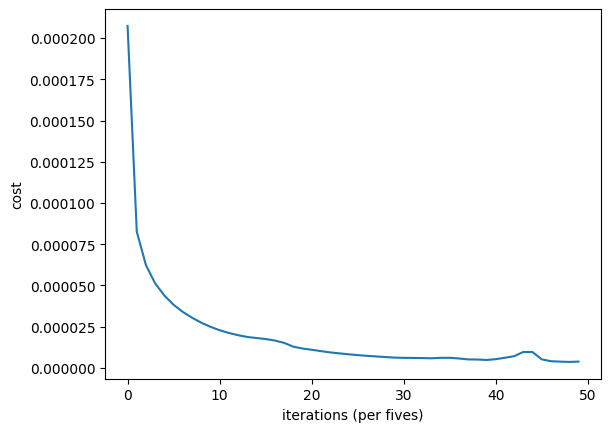

In [ ]:
# Plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per fives)')
plt.show()

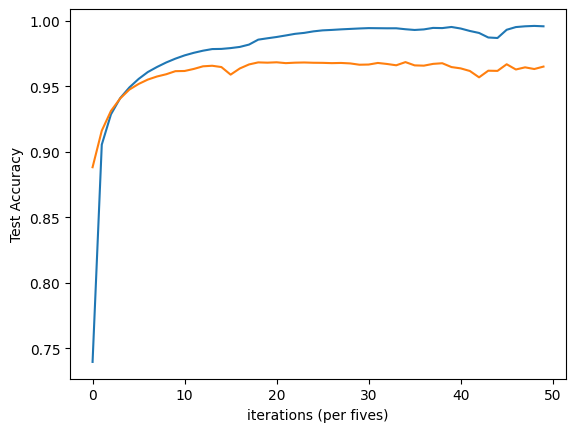

In [ ]:
# Plot the train accuracy
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')

# Plot the test accuracy
plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.show()

# Introduction to modules, layers, and models

Щоб займатися машинним навчанням у TensorFlow, вам, ймовірно, знадобиться визначити, зберегти та відновити модель.

Модель — це, абстрактно:

* Функція, яка обчислює щось над тензорами (**пряме поширення**)
* Декілька змінних, які можна оновлювати у відповідь на навчання

Зрозуміти, як визначаються моделі TensorFlow. Це дозволяє дізнатися, як TensorFlow збирає змінні та моделі, а також як їх зберігати та відновлювати.

Примітка: Якщо ви хочете негайно розпочати роботу з Keras, будь ласка, перегляньте [збірку посібників Keras](./keras/).

## Setup

In [ ]:
import tensorflow as tf
import keras
from datetime import datetime

%load_ext tensorboard

## TensorFlow Modules

Більшість моделей складаються з шарів. Шари — це функції з відомою математичною структурою, які можна повторно використовувати і які мають навчальні змінні. У TensorFlow більшість високорівневих реалізацій шарів та моделей, таких як Keras або [Sonnet](https://github.com/deepmind/sonnet), базуються на одному фундаментальному класі: `tf.Module`.

### Створення модулів

Ось приклад дуже простого `tf.Module`, який працює з скалярним тензором:


In [ ]:
class SimpleModule(tf.Module):

  def __init__(self, name=None):
    super().__init__(name=name)
    self.a_variable = tf.Variable(5.0, name="train_me")
    self.non_trainable_variable = tf.Variable(5.0, trainable=False, name="do_not_train_me")

  def __call__(self, x):
    return self.a_variable * x + self.non_trainable_variable

simple_module = SimpleModule(name="simple")

simple_module(tf.constant(5.0))

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

Модулі та, за розширенням, шари є термінами глибокого навчання для "об'єктів": вони мають внутрішній стан і методи, які використовують цей стан.

В `__call__` немає нічого особливого, окрім того, що він діє як [викликаний об'єкт Python](https://stackoverflow.com/questions/111234/what-is-a-callable); ви можете викликати ваші моделі з будь-якими функціями, які бажаєте.

Ви можете увімкнути або вимкнути навчальність змінних з будь-якої причини, включаючи заморожування шарів і змінних під час доопрацювання (fine-tuning).

Примітка: `tf.Module` є базовим класом як для `tf.keras.layers.Layer`, так і для `tf.keras.Model`, тому все, з чим ви стикаєтеся тут, також застосовується в Keras. Для історичної сумісності Keras шари не збирають змінні з модулів, тому ваші моделі повинні використовувати або тільки модулі, або тільки шари Keras. Однак методи, показані нижче для перевірки змінних, однакові в обох випадках.

Підкласовуючи `tf.Module`, будь-які екземпляри `tf.Variable` або `tf.Module`, призначені властивостям цього об'єкта, автоматично збираються. Це дозволяє зберігати та завантажувати змінні, а також створювати колекції `tf.Module`.

In [ ]:
# All trainable variables
print("trainable variables:", simple_module.trainable_variables)
# Every variable
print("all variables:", simple_module.variables)

Ось приклад моделі з двома лінійними шарами, створеної з модулів.

Спочатку створимо a dense (linear) шар:

In [ ]:
class Dense(tf.Module):

  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')

  def __call__(self, x):
    y = tf.matmul(x, self.w) + self.b
    return tf.nn.relu(y)

А тепер повна модель, яка створює два екземпляри шару і застосовує їх:

In [ ]:
class SequentialModule(tf.Module):

  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=3, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=2)

  def __call__(self, x):
    x = self.dense_1(x)
    return self.dense_2(x)

# You have made a model!
my_model = SequentialModule(name="the_model")

# Call it, with random results
print("Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]])))

Model results: tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)


Екземпляри `tf.Module` автоматично, рекурсивно збирають будь-які екземпляри `tf.Variable` або `tf.Module`, які їм призначені. Це дозволяє управляти колекціями `tf.Module` з одного екземпляра моделі та зберігати і завантажувати цілі моделі.

In [ ]:
print("Submodules:", my_model.submodules)


Submodules: (<__main__.Dense object at 0x7ff1f9fae470>, <__main__.Dense object at 0x7ff1f9fadae0>)


In [ ]:
for var in my_model.variables:
  print(var, "\n")

### Збереження ваг

Ви можете зберегти `tf.Module` як [контрольну точку](./checkpoint.ipynb) (checkpoint), так і [SavedModel](./saved_model.ipynb).

Контрольні точки — це просто ваги (тобто значення набору змінних всередині модуля та його підмодулів):

In [ ]:
chkp_path = "my_checkpoint"
checkpoint = tf.train.Checkpoint(model=my_model)
checkpoint.write(chkp_path)

'my_checkpoint'

Контрольні точки складаються з двох видів файлів: самих даних і індексного файлу для метаданих. Індексний файл відстежує, що саме збережено і як нумеруються контрольні точки, тоді як дані контрольної точки містять значення змінних і їхні шляхи для пошуку атрибутів.

In [ ]:
checkpoint = tf.train.Checkpoint(my_model)
# Restore the checkpointed values to the `model` object.
checkpoint.restore("my_checkpoint")